# Exploring Dandiset 001359: Human Patch-seq Data from AIBS

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001359](https://dandiarchive.org/dandiset/001359/0.250401.1603) version 0.250401.1603.

**Dandiset Name:** 20250331_AIBS_Patchseq_human

**Description:** HMBA Lein PatchSeq upload (human) (Q1 2025)

This Dandiset contains Patch-seq data from human brain tissue, collected by the Allen Institute for Brain Science. Patch-seq is a multimodal technique that combines patch-clamp electrophysiology, morphological reconstruction, and single-cell transcriptomics from the same neuron.

## What this notebook covers

This notebook will demonstrate how to:
1.  Connect to the DANDI archive and access information about the Dandiset.
2.  List assets (NWB files) within the Dandiset.
3.  Load a specific NWB file from the Dandiset.
4.  Explore the metadata and structure of the NWB file.
5.  Load and visualize some electrophysiological data (CurrentClampSeries) from the NWB file.
6.  Load and visualize spike times if available.

## Required Packages

To run this notebook, you will need the following Python packages. We assume these are already installed on your system.

*   `dandi` (for interacting with the DANDI Archive)
*   `pynwb` (for reading NWB files)
*   `h5py` (dependency for pynwb for HDF5 file access)
*   `remfile` (for efficiently reading remote HDF5 files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `seaborn` (for enhanced visualizations)

No `pip install` commands are included in this notebook.

## Loading the Dandiset using the DANDI API

In [1]:
# Import necessary libraries
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile

# Set seaborn theme for plots (optional)
sns.set_theme()

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001359"
dandiset_version = "0.250401.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This URL is for the overall dandiset, not the specific version
print(f"Dandiset (version specific) URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")
print(f"Description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.asset_id})") # Corrected from asset.identifier

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Dandiset (version specific) URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Description: HMBA Lein PatchSeq upload (human) (Q1 2025)

First 5 assets:


AttributeError: 'RemoteBlobAsset' object has no attribute 'asset_id'

## Loading an NWB file from the Dandiset

We will now load one of the NWB files from the Dandiset. We'll choose the first asset listed: `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`.

The asset ID for this file is `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`.
The DANDI API URL to download this asset is `https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`.

In [3]:
# Define the URL for the specific NWB file
# This URL was obtained from the `tools_cli.py nwb-file-info` command output
nwb_file_url = "https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/"
asset_id = "c269347a-2d4b-4b6a-8b7c-2ef303ff503d" # For Neurosift link

print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file using remfile for remote access
# This code snippet is based on the output of `tools_cli.py nwb-file-info`
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True) # Ensure read-only and load namespaces
nwb = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id if nwb.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session Description: PLACEHOLDER
Session Start Time: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279


### Neurosift Link for Interactive Exploration

You can explore this NWB file interactively on Neurosift using the following link:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

### Summarizing NWB File Contents

Let's look at some of the metadata and data groups available in this NWB file.
NWB files typically organize data into groups like `acquisition` (raw acquired data), `stimulus` (stimulus waveforms), and `processing` (processed data like spike times).

#### General Information:
*   **Identifier:** `{{nwb.identifier}}` (This is a unique ID for the NWB file itself)
*   **Session Description:** `{{nwb.session_description}}`
*   **Session Start Time:** `{{nwb.session_start_time}}`
*   **Subject ID:** `{{nwb.subject.subject_id if nwb.subject else 'N/A'}}`
*   **Subject Species:** `{{nwb.subject.species if nwb.subject else 'N/A'}}`
*   **Subject Sex:** `{{nwb.subject.sex if nwb.subject else 'N/A'}}`
*   **Institution:** `{{nwb.institution}}`

#### Acquisition Data:
The `nwb.acquisition` group contains the raw data acquired during the experiment. These are typically `TimeSeries` objects.
We can list the names of the time series available:

In [4]:
print("Available TimeSeries in nwb.acquisition:")
for series_name, series_obj in nwb.acquisition.items():
    print(f"- {series_name} (type: {type(series_obj).__name__}, unit: {series_obj.unit if hasattr(series_obj, 'unit') else 'N/A'})")

Available TimeSeries in nwb.acquisition:
- data_00000_AD0 (type: VoltageClampSeries, unit: amperes)
- data_00001_AD0 (type: VoltageClampSeries, unit: amperes)
- data_00002_AD0 (type: VoltageClampSeries, unit: amperes)
- data_00003_AD0 (type: VoltageClampSeries, unit: amperes)
- data_00004_AD0 (type: CurrentClampSeries, unit: volts)
- data_00005_AD0 (type: CurrentClampSeries, unit: volts)
- data_00006_AD0 (type: CurrentClampSeries, unit: volts)
- data_00007_AD0 (type: CurrentClampSeries, unit: volts)
- data_00008_AD0 (type: CurrentClampSeries, unit: volts)
- data_00009_AD0 (type: CurrentClampSeries, unit: volts)
- data_00010_AD0 (type: CurrentClampSeries, unit: volts)
- data_00011_AD0 (type: CurrentClampSeries, unit: volts)
- data_00012_AD0 (type: CurrentClampSeries, unit: volts)
- data_00013_AD0 (type: CurrentClampSeries, unit: volts)
- data_00014_AD0 (type: CurrentClampSeries, unit: volts)
- data_00015_AD0 (type: CurrentClampSeries, unit: volts)
- data_00016_AD0 (type: CurrentClampSer

#### Stimulus Data:
The `nwb.stimulus` group contains the stimulus waveforms applied during the experiment.

In [5]:
print("\nAvailable TimeSeries in nwb.stimulus:")
if nwb.stimulus:
    for series_name, series_obj in nwb.stimulus.items():
        print(f"- {series_name} (type: {type(series_obj).__name__}, unit: {series_obj.unit if hasattr(series_obj, 'unit') else 'N/A'})")
else:
    print("No stimulus data found.")


Available TimeSeries in nwb.stimulus:
- data_00000_DA0 (type: VoltageClampStimulusSeries, unit: volts)
- data_00001_DA0 (type: VoltageClampStimulusSeries, unit: volts)
- data_00002_DA0 (type: VoltageClampStimulusSeries, unit: volts)
- data_00003_DA0 (type: VoltageClampStimulusSeries, unit: volts)
- data_00004_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00005_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00006_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00007_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00008_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00009_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00010_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00011_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00012_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00013_DA0 (type: CurrentClampStimulusSeries, unit: amperes)
- data_00014_DA0 (type: Current

#### Processing Modules:
The `nwb.processing` group contains data resulting from pre-processing steps. For example, it might contain a `spikes` module with detected spike times.

In [6]:
print("\nAvailable Processing Modules in nwb.processing:")
if nwb.processing:
    for module_name, module_obj in nwb.processing.items():
        print(f"Processing Module: {module_name}")
        for data_interface_name, data_interface_obj in module_obj.data_interfaces.items():
            print(f"  - {data_interface_name} (type: {type(data_interface_obj).__name__})")
else:
    print("No processing modules found.")


Available Processing Modules in nwb.processing:
Processing Module: spikes
  - Sweep_10 (type: TimeSeries)
  - Sweep_12 (type: TimeSeries)
  - Sweep_14 (type: TimeSeries)
  - Sweep_15 (type: TimeSeries)
  - Sweep_17 (type: TimeSeries)
  - Sweep_18 (type: TimeSeries)
  - Sweep_20 (type: TimeSeries)
  - Sweep_21 (type: TimeSeries)
  - Sweep_23 (type: TimeSeries)
  - Sweep_26 (type: TimeSeries)
  - Sweep_33 (type: TimeSeries)
  - Sweep_34 (type: TimeSeries)
  - Sweep_36 (type: TimeSeries)
  - Sweep_37 (type: TimeSeries)
  - Sweep_38 (type: TimeSeries)
  - Sweep_39 (type: TimeSeries)
  - Sweep_41 (type: TimeSeries)
  - Sweep_42 (type: TimeSeries)
  - Sweep_5 (type: TimeSeries)
  - Sweep_62 (type: TimeSeries)
  - Sweep_63 (type: TimeSeries)
  - Sweep_64 (type: TimeSeries)
  - Sweep_65 (type: TimeSeries)
  - Sweep_67 (type: TimeSeries)
  - Sweep_7 (type: TimeSeries)
  - Sweep_9 (type: TimeSeries)


## Visualizing Data from the NWB File

Let's load and visualize some data. We'll look at a `CurrentClampSeries` from the `acquisition` group.
Based on the `nwb-file-info` output, `data_00004_AD0` is a `CurrentClampSeries`.

Selected CurrentClampSeries: data_00004_AD0
Description: PLACEHOLDER
Unit: volts
Rate: 50000.0 Hz
Data shape: (307375,)


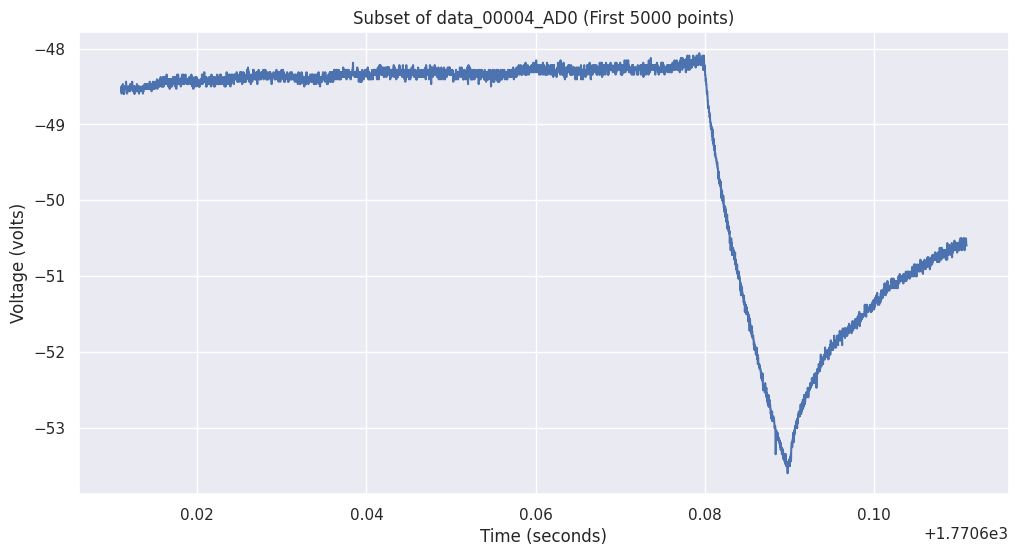

In [7]:
# Select a CurrentClampSeries - e.g., 'data_00004_AD0'
ccs_name = 'data_00004_AD0'
if ccs_name in nwb.acquisition:
    current_clamp_series = nwb.acquisition[ccs_name]
    print(f"Selected CurrentClampSeries: {ccs_name}")
    print(f"Description: {current_clamp_series.description}")
    print(f"Unit: {current_clamp_series.unit}")
    print(f"Rate: {current_clamp_series.rate} Hz")
    print(f"Data shape: {current_clamp_series.data.shape}")

    # Load a subset of the data to avoid loading too much into memory
    # Let's load the first 5000 data points (or fewer if the series is shorter)
    num_points_to_load = min(5000, current_clamp_series.data.shape[0])
    data_subset = current_clamp_series.data[:num_points_to_load]

    # Create a time vector for the subset
    # Timestamps can be calculated from starting_time and rate
    time_subset = current_clamp_series.starting_time + np.arange(num_points_to_load) / current_clamp_series.rate

    # Plot the data subset
    plt.figure(figsize=(12, 6))
    # No seaborn style for image like data, but fine for line plots
    sns.set_theme() # Apply seaborn theme
    plt.plot(time_subset, data_subset)
    plt.title(f"Subset of {ccs_name} (First {num_points_to_load} points)")
    plt.xlabel(f"Time ({current_clamp_series.starting_time_unit})")
    plt.ylabel(f"Voltage ({current_clamp_series.unit})")
    plt.grid(True)
    plt.show()
else:
    print(f"CurrentClampSeries '{ccs_name}' not found in nwb.acquisition.")

The plot above shows a short segment of a current clamp recording. This type of data typically represents the membrane voltage of a neuron over time in response to an injected current.

### Visualizing Stimulus Data (Example)

Let's try to plot the corresponding stimulus for `data_00004_AD0` if it exists. The stimulus series usually has a similar name, like `data_00004_DA0`.

Selected StimulusSeries: data_00004_DA0
Description: PLACEHOLDER
Unit: amperes
Rate: 50000.0 Hz
Data shape: (307375,)


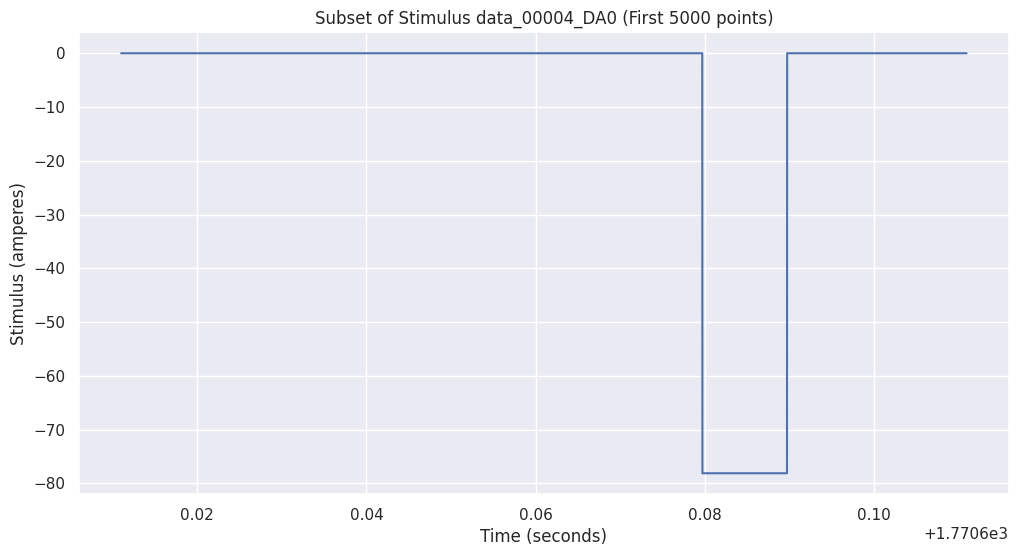

In [8]:
stim_name = 'data_00004_DA0' # Corresponds to data_00004_AD0 acquisition
if nwb.stimulus and stim_name in nwb.stimulus:
    stimulus_series = nwb.stimulus[stim_name]
    print(f"Selected StimulusSeries: {stim_name}")
    print(f"Description: {stimulus_series.description}")
    print(f"Unit: {stimulus_series.unit}")
    print(f"Rate: {stimulus_series.rate} Hz")
    print(f"Data shape: {stimulus_series.data.shape}")

    # Load a subset of the stimulus data, corresponding to the acquisition data plotted
    # Ensure the number of points matches the duration needed
    # Note: stimulus and acquisition might have different total lengths but should have same rate for direct comparison
    stim_data_subset = stimulus_series.data[:num_points_to_load] # Assuming same rate and starting time for simplicity

    # Time vector should be the same as for current_clamp_series if rates and start times match
    # Or, calculate independently:
    # stim_time_subset = stimulus_series.starting_time + np.arange(num_points_to_load) / stimulus_series.rate


    plt.figure(figsize=(12, 6))
    sns.set_theme() # Apply seaborn theme
    plt.plot(time_subset, stim_data_subset) # using time_subset from previous cell
    plt.title(f"Subset of Stimulus {stim_name} (First {num_points_to_load} points)")
    plt.xlabel(f"Time ({stimulus_series.starting_time_unit})")
    plt.ylabel(f"Stimulus ({stimulus_series.unit})")
    plt.grid(True)
    plt.show()

else:
    print(f"StimulusSeries '{stim_name}' not found in nwb.stimulus or nwb.stimulus is empty.")

### Exploring Processed Spike Data

The `nwb.processing` module might contain detected spike times. From the `nwb-file-info` output, we saw a `spikes` module with entries like `Sweep_33`. These are `TimeSeries` objects where the `data` or `timestamps` attribute holds spike times.

Spike data found in nwb.processing['spikes']:

Spike times from Sweep_33 (using .timestamps):
[0.5954]


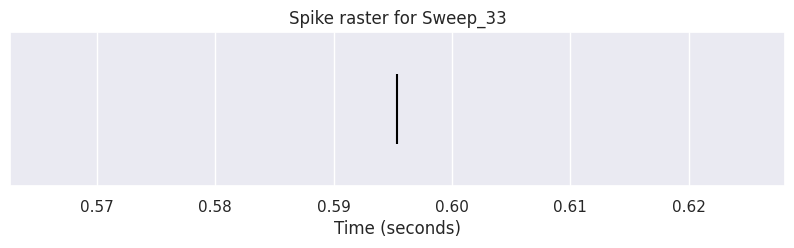


Summary of spike events per sweep in 'spikes' module:
- Sweep_10: 0 spikes/events
- Sweep_12: 0 spikes/events


- Sweep_14: 0 spikes/events
- Sweep_15: 0 spikes/events
- Sweep_17: 0 spikes/events
- Sweep_18: 0 spikes/events
- Sweep_20: 0 spikes/events
- Sweep_21: 0 spikes/events
- Sweep_23: 0 spikes/events
- Sweep_26: 0 spikes/events
- Sweep_33: 1 spikes/events
- Sweep_34: 1 spikes/events
- Sweep_36: 1 spikes/events
- Sweep_37: 1 spikes/events
- Sweep_38: 2 spikes/events
- Sweep_39: 7 spikes/events
- Sweep_41: 7 spikes/events
- Sweep_42: 9 spikes/events
- Sweep_5: 0 spikes/events
- Sweep_62: 1 spikes/events
- Sweep_63: 1 spikes/events
- Sweep_64: 1 spikes/events
- Sweep_65: 6 spikes/events
- Sweep_67: 2 spikes/events
- Sweep_7: 0 spikes/events
- Sweep_9: 0 spikes/events


In [9]:
if nwb.processing and "spikes" in nwb.processing:
    spikes_module = nwb.processing["spikes"]
    print("Spike data found in nwb.processing['spikes']:")

    # Let's try to access and plot spike times from 'Sweep_33' as an example
    sweep_with_spikes_name = "Sweep_33" # Example from nwb-file-info
    if sweep_with_spikes_name in spikes_module.data_interfaces:
        spike_times_series = spikes_module.data_interfaces[sweep_with_spikes_name]
        
        # Spike times are often stored in the 'timestamps' attribute for TimeSeries
        # or 'data' if it's just a list of times. Let's check timestamps first.
        if hasattr(spike_times_series, 'timestamps') and spike_times_series.timestamps is not None and len(spike_times_series.timestamps) > 0:
            spike_times = spike_times_series.timestamps[:] # Load all spike times for this sweep
            print(f"\nSpike times from {sweep_with_spikes_name} (using .timestamps):")
            print(spike_times)

            if len(spike_times) > 0:
                plt.figure(figsize=(10, 2))
                sns.set_theme() # Apply seaborn theme
                plt.eventplot(spike_times, colors='black', lineoffsets=0, linelengths=0.5)
                plt.title(f"Spike raster for {sweep_with_spikes_name}")
                plt.xlabel(f"Time ({spike_times_series.timestamps_unit})")
                plt.yticks([])
                plt.show()
            else:
                print(f"No spikes found in {sweep_with_spikes_name} (timestamps empty).")

        elif hasattr(spike_times_series, 'data') and spike_times_series.data is not None and len(spike_times_series.data) > 0:
            # This case might be less common for spike times but check anyway
            spike_data = spike_times_series.data[:]
            print(f"\nData from {sweep_with_spikes_name} (using .data):")
            print(spike_data)
            # Interpretation of .data depends on how spikes are stored. If these are times:
            if len(spike_data) > 0:
                plt.figure(figsize=(10, 2))
                sns.set_theme() # Apply seaborn theme
                plt.eventplot(spike_data, colors='blue', lineoffsets=0, linelengths=0.5)
                plt.title(f"Event plot for {sweep_with_spikes_name} (from .data)")
                plt.xlabel(f"Time ({spike_times_series.unit})") # Assuming unit refers to time here
                plt.yticks([])
                plt.show()
            else:
                 print(f"No spike events found in {sweep_with_spikes_name} (data empty).")
        else:
            print(f"No spike timestamps or data found in {sweep_with_spikes_name} or it's empty.")
            # The nwb-file-info indicated Sweep_33.data has shape (1,) and Sweep_33.timestamps has shape (1,)
            # So one of the above conditions should be met if the data is present.

    else:
        print(f"TimeSeries '{sweep_with_spikes_name}' not found in spikes module.")
    
    # Example of listing all spike event series and their number of spikes
    print("\nSummary of spike events per sweep in 'spikes' module:")
    for name, series in spikes_module.data_interfaces.items():
        count = 0
        if hasattr(series, 'timestamps') and series.timestamps is not None:
            count = len(series.timestamps[:])
        elif hasattr(series, 'data') and series.data is not None: # Fallback
            count = len(series.data[:])
        print(f"- {name}: {count} spikes/events")

else:
    print("No 'spikes' processing module found or nwb.processing is empty.")

## Summary and Future Directions

This notebook demonstrated the initial steps for exploring Dandiset 001359. We covered:
*   Connecting to the DANDI archive and retrieving Dandiset metadata.
*   Listing assets within the Dandiset.
*   Loading a specific NWB file using its DANDI API URL and the `remfile`, `h5py`, and `pynwb` libraries.
*   Inspecting basic metadata and the structure of the NWB file, including `acquisition`, `stimulus`, and `processing` groups.
*   Visualizing a subset of a `CurrentClampSeries` (electrophysiological recording) and its corresponding stimulus.
*   Attempting to visualize spike times from a `TimeSeries` object within a `spikes` processing module.

### Possible Future Directions:
1.  **Detailed Sweep Analysis:** Iterate through all sweeps (`PatchClampSeries`) in an NWB file, plot various stimulus-response pairs, and extract features (e.g., firing rate, spike adaptation, input resistance).
2.  **Cross-File Analysis:** Extend the analysis to multiple NWB files in the Dandiset to compare electrophysiological properties across different cells or experimental conditions.
3.  **Correlation with other Modalities:** Since this is Patch-seq data, a key future step would be to link the electrophysiological data with morphological and/or transcriptomic data for the same cells, if available within the Dandiset or related resources.
4.  **Advanced Visualization:** Create more sophisticated visualizations, such as plotting multiple sweeps overlaid, F-I curves (firing rate vs. injected current), or phase-plane plots.
5.  **Epoch-based Analysis:** Use the `nwb.epochs` table to analyze data related to specific experimental epochs or conditions.

This notebook provides a starting point. The richness of NWB files and the DANDI archive allows for in-depth exploration tailored to specific research questions.

Remember to consult the NWB format documentation and PyNWB tutorials for more advanced usage and details on accessing different data types.

---
End of AI-Generated Notebook.